## Notebook Walkthrough of Neural Net Decomposition Method

Please see my ResearchGate for my Other ML + Data Science publications on Catalyst Discovery, Graph Neural Net Algorithms, High Entropy Materials, Perovskites, Li electrodes and Carbonaceous Membranes
(https://www.researchgate.net/profile/Zachary-Gariepy/research)

### Required Files to run this notebook:

- helpers.py : helper classes/functions

- All_data.csv : Publication raw data 

- Arrangement.png : (optional) visual aid for final visualization step

In [ ]:
#Package imports
import pandas as pd
import numpy as np 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg

#Helper functions for specific feature engineering used in paper and NN decomp alg
import helpers

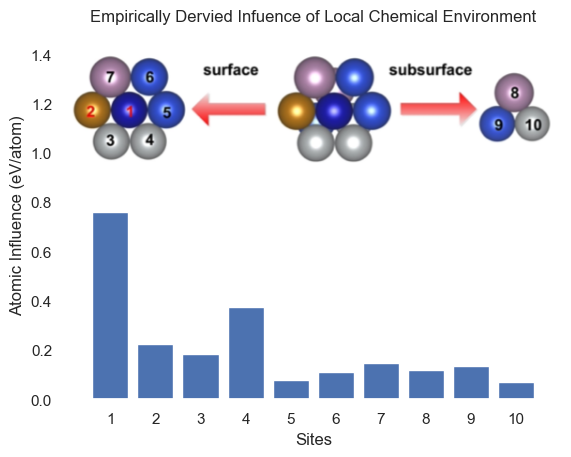

In [18]:
#1 - Read in CO,CHO or COOH dataset, select 1 of the 3 adsorbates to study
df = pd.read_csv('All_data.csv')
df_COOH = df[df['Adsorbate']=='CHO']

#2 - Create Dictionnary for chemical descriptors you wish to use
element_dict = {'Co': [9,4,1.88],'Fe': [8,4,1.83],'Cu': [11,4,1.9],'Ni': [10,4,1.91],'Mo': [6,5,2.16]} 

#3 - Initialize model_analysis class
model_analysis = helpers.Model_analyzer(element_dict,
                                        10,
                                        df_COOH.drop(columns=['Adsorbate','Eads']))

#4 - Model Training + Fitting (simplest model possible)

x = model_analysis.feature_embedding() #create inputs using chemical descriptor dict.
y = df_COOH['Eads']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.15)

model = helpers.MyModel()
model.compile(optimizer='adam', loss='mse', metrics=['mae','mse'])
h = model.fit(x_train, y_train, epochs=3000, callbacks=[],verbose=0 )

#5 - Perform NN decompistion:
#Can specify sites 1-10 (See SI of paper for visualization/elaboration)
influences=[]
site=[]
for i in range(10):
    site.append(i+1)
    avg_inf,x1 = model_analysis.NN_decomposition(i+1,model)
    influences.append(avg_inf)
    
#6 - Visualize Results
sns.set_theme()
plt.bar(site, influences, align='center', alpha=1)
plt.xlabel('Sites')
plt.ylabel('Atomic Influence (eV/atom)')
plt.title('Empirically Dervied Infuence of Local Chemical Environment')
plt.xticks(site)
plt.grid(False)
img = mpimg.imread('atomic_arrangement.png')
plt.imshow(img, extent=[0, 11, 0, 1.5], aspect='auto', alpha=1)